In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Background to Irish Weather Buoy Network data

For this analysis I going to use data from Irish weather buoy network data [[1](https://erddap.marine.ie/erddap/tabledap/IWBNetwork.html)] 
Here I read in dataset and have a peak at the data to see which columns to simulate for the study

In [2]:
waveBuoyReal = pd.read_csv('IWBNetwork_d7a0_c1fd_81c3.csv')

waveBuoyReal.head()

,station_id,CallSign,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,...,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp,QC_Flag
0,NaN,NaN,degrees_east,degrees_north,UTC,mb,degrees_true,kn,kn,m,...,m,degree_C,degree_C,degree_C,PSU,percent,degrees,degrees_true,s,NaN
1,M2,62091.0,-5.4302,53.4836,2019-11-30T00:00:00Z,1019.482,140.0,11.385,15.654,0.586,...,0.703,8.75,NaN,12.441,NaN,64.844,32.344,156.094,2.813,0.0
2,M3,62092.0,-10.548261,51.215956,2019-11-30T00:00:00Z,1007.324,110.0,24.477,33.3,2.344,...,3.281,10.898,NaN,10.859,NaN,87.891,28.125,116.719,5.742,0.0
3,M4,62093.0,-9.999136,54.999967,2019-11-30T00:00:00Z,1017.48,117.0,18.073,22.343,1.758,...,2.109,7.871,NaN,10.781,NaN,NaN,61.875,357.188,9.609,0.0
4,M5,62094.0,-6.704336,51.690425,2019-11-30T00:00:00Z,1015.125,121.0,21.062,26.754,1.563,...,1.875,10.654,NaN,11.865,NaN,85.547,36.563,105.469,5.508,0.0


The head method above shown me that the first rows would not be used for inital analysis for the dataset as these are units. These must be removed 

In [3]:
waveBuoyRealDataSet = waveBuoyReal.iloc[1:]
waveBuoyRealDataSet.head()

,station_id,CallSign,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,...,Hmax,AirTemperature,DewPoint,SeaTemperature,salinity,RelativeHumidity,SprTp,ThTp,Tp,QC_Flag
1,M2,62091.0,-5.4302,53.4836,2019-11-30T00:00:00Z,1019.482,140.0,11.385,15.654,0.586,...,0.703,8.75,NaN,12.441,NaN,64.844,32.344,156.094,2.813,0.0
2,M3,62092.0,-10.548261,51.215956,2019-11-30T00:00:00Z,1007.324,110.0,24.477,33.3,2.344,...,3.281,10.898,NaN,10.859,NaN,87.891,28.125,116.719,5.742,0.0
3,M4,62093.0,-9.999136,54.999967,2019-11-30T00:00:00Z,1017.48,117.0,18.073,22.343,1.758,...,2.109,7.871,NaN,10.781,NaN,NaN,61.875,357.188,9.609,0.0
4,M5,62094.0,-6.704336,51.690425,2019-11-30T00:00:00Z,1015.125,121.0,21.062,26.754,1.563,...,1.875,10.654,NaN,11.865,NaN,85.547,36.563,105.469,5.508,0.0
5,M6,62095.0,-15.88135,53.07482,2019-11-30T00:00:00Z,1006.978,112.0,19.809,29.145,3.359,...,4.531,10.752,NaN,11.758,NaN,91.113,67.148,143.438,6.797,0.0


### Display distributions for fields of interst to wave height

The fields I use are the following  may discount some as there may be not relationship in the investigation
- station_id String 
- time Datetime
- AtmosphericPressure number
- WindDirection String 
- WindSpeed number
- Gust number 
- WaveHeight number 
- Hmax(Maximum Wave Height) number 
- AirTemperature number
- SeaTemperature number 
- RelativeHumidity number 


I am going to create a histrogram for each field so I can see what distributin if any field is in . First thing I might have to change values for columns are pandas often read in data as generic object types 

In [4]:
realwaveBuoyDataSet = waveBuoyRealDataSet[['station_id','time','AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','Hmax','AirTemperature','SeaTemperature','RelativeHumidity']]
realwaveBuoyDataSet = realwaveBuoyDataSet.dropna(how='any')           # assign back
realwaveBuoyDataSet.dropna(how='any', inplace=True)  # set inplace parameter
realwaveBuoyDataSet.shape

(472, 12)

From above shows that I must change all data types to whatever type they should be 
### Numeric fields 


In [5]:
realwaveBuoyDataSet.iloc[:,0]= realwaveBuoyDataSet.iloc[:,0].astype(str)
realwaveBuoyDataSet.iloc[:,1] = pd.to_datetime(realwaveBuoyDataSet.iloc[:,1],errors='ignore')
realwaveBuoyDataSet.iloc[:,2] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,2],errors='ignore')
realwaveBuoyDataSet.iloc[:,3] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,3],errors='ignore')
realwaveBuoyDataSet.iloc[:,4] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,4],errors='ignore')
realwaveBuoyDataSet.iloc[:,5] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,5],errors='ignore')
realwaveBuoyDataSet.iloc[:,6] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,6],errors='ignore')
realwaveBuoyDataSet.iloc[:,7] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,7],errors='ignore')
realwaveBuoyDataSet.iloc[:,8] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,8],errors='ignore')
realwaveBuoyDataSet.iloc[:,9] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,9],errors='ignore')
realwaveBuoyDataSet.iloc[:,10] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,10],errors='ignore')
realwaveBuoyDataSet.iloc[:,11] = pd.to_numeric(realwaveBuoyDataSet.iloc[:,11],errors='ignore')
realwaveBuoyDataSet.dtypes

station_id                          object
time                   datetime64[ns, UTC]
AtmosphericPressure                float64
WindDirection                      float64
WindSpeed                          float64
Gust                               float64
WaveHeight                         float64
WavePeriod                         float64
Hmax                               float64
AirTemperature                     float64
SeaTemperature                     float64
RelativeHumidity                   float64
dtype: object

#### Histrogram of Atmoseric pressure 

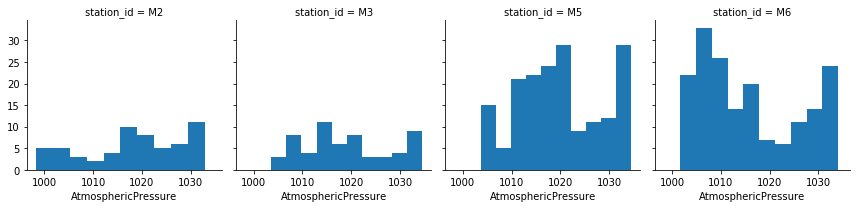

In [6]:

g = sns.FacetGrid(realwaveBuoyDataSet , col="station_id")
g = g.map(plt.hist, "AtmosphericPressure")
g

### Wind direction

First thing this going to be a categorical varaible 

In [7]:

def deg_to_text(deg):
    return ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"][round(deg/22.5)%16]

realwaveBuoyDataSet['WindDirection'] = realwaveBuoyDataSet['WindDirection'].round()

realwaveBuoyDataSet['WindDirection'] =realwaveBuoyDataSet['WindDirection'].apply(deg_to_text)


### Histrogram of Wind speed 

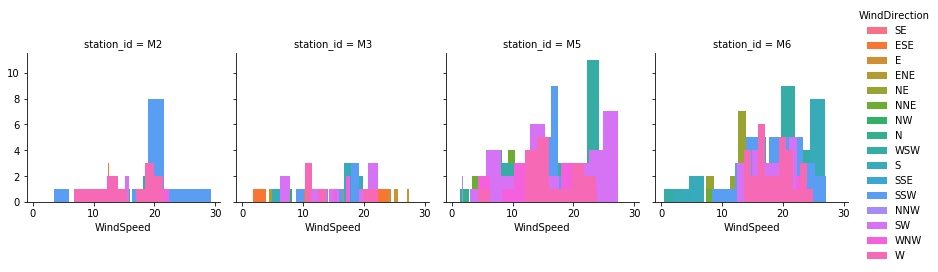

In [8]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "WindSpeed").add_legend()
g



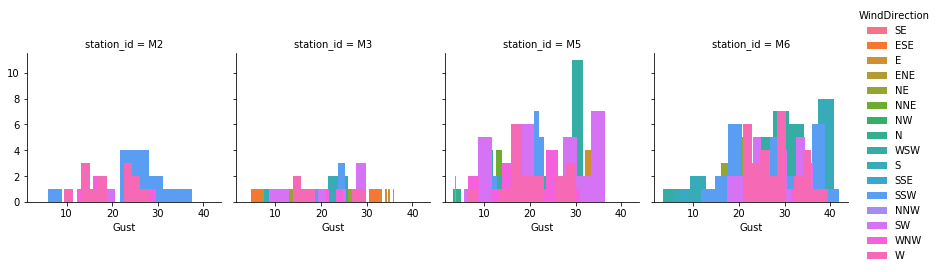

In [9]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "Gust").add_legend()
g

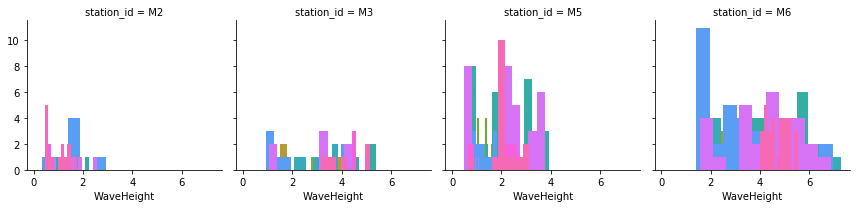

In [10]:
g = sns.FacetGrid(realwaveBuoyDataSet,hue = 'WindDirection' , col="station_id")
g = g.map(plt.hist, "WaveHeight")


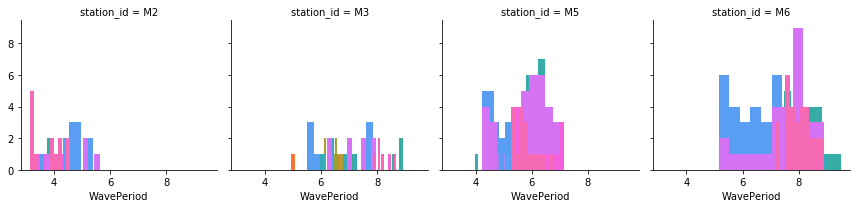

In [11]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "WavePeriod")

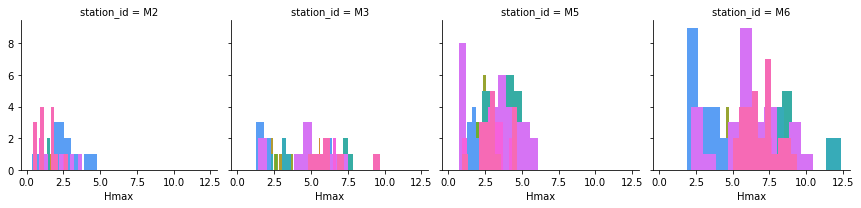

In [12]:
g = sns.FacetGrid(realwaveBuoyDataSet,hue = 'WindDirection' , col="station_id")
g = g.map(plt.hist, "Hmax")

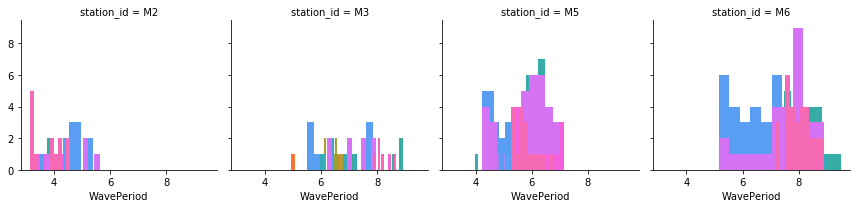

In [13]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "WavePeriod")

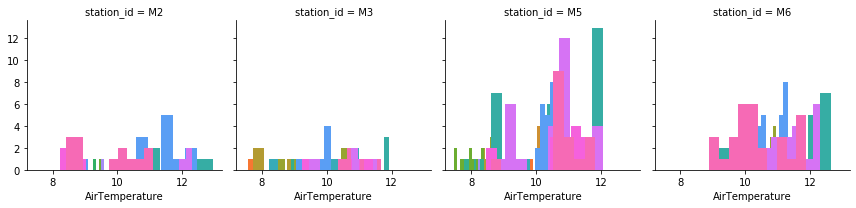

In [14]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "AirTemperature")

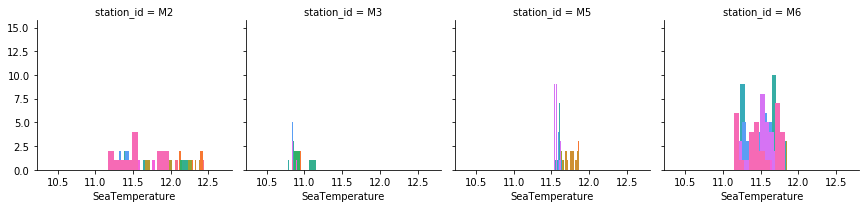

In [15]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "SeaTemperature")

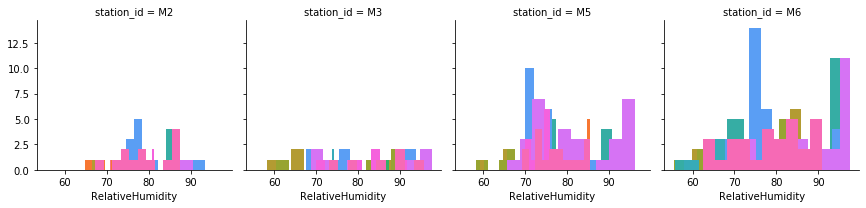

In [16]:
g = sns.FacetGrid(realwaveBuoyDataSet ,hue = 'WindDirection', col="station_id")
g = g.map(plt.hist, "RelativeHumidity")

After creating the histrograms and checking the distribution it was decided only use data from M6 as data where follow poisson or noraml distribution in most cases 

In [30]:
realwaveBuoyDataSetM6 = realwaveBuoyDataSet.where(realwaveBuoyDataSet['station_id'] == "M6")
del realwaveBuoyDataSetM6['station_id']

allfilters = (realwaveBuoyDataSet['WindDirection'] == "S")  |(realwaveBuoyDataSet['WindDirection'] == "SW")
allfilters = allfilters  | (realwaveBuoyDataSet['WindDirection'] == "W") |  (realwaveBuoyDataSet['WindDirection'] == "WNW")

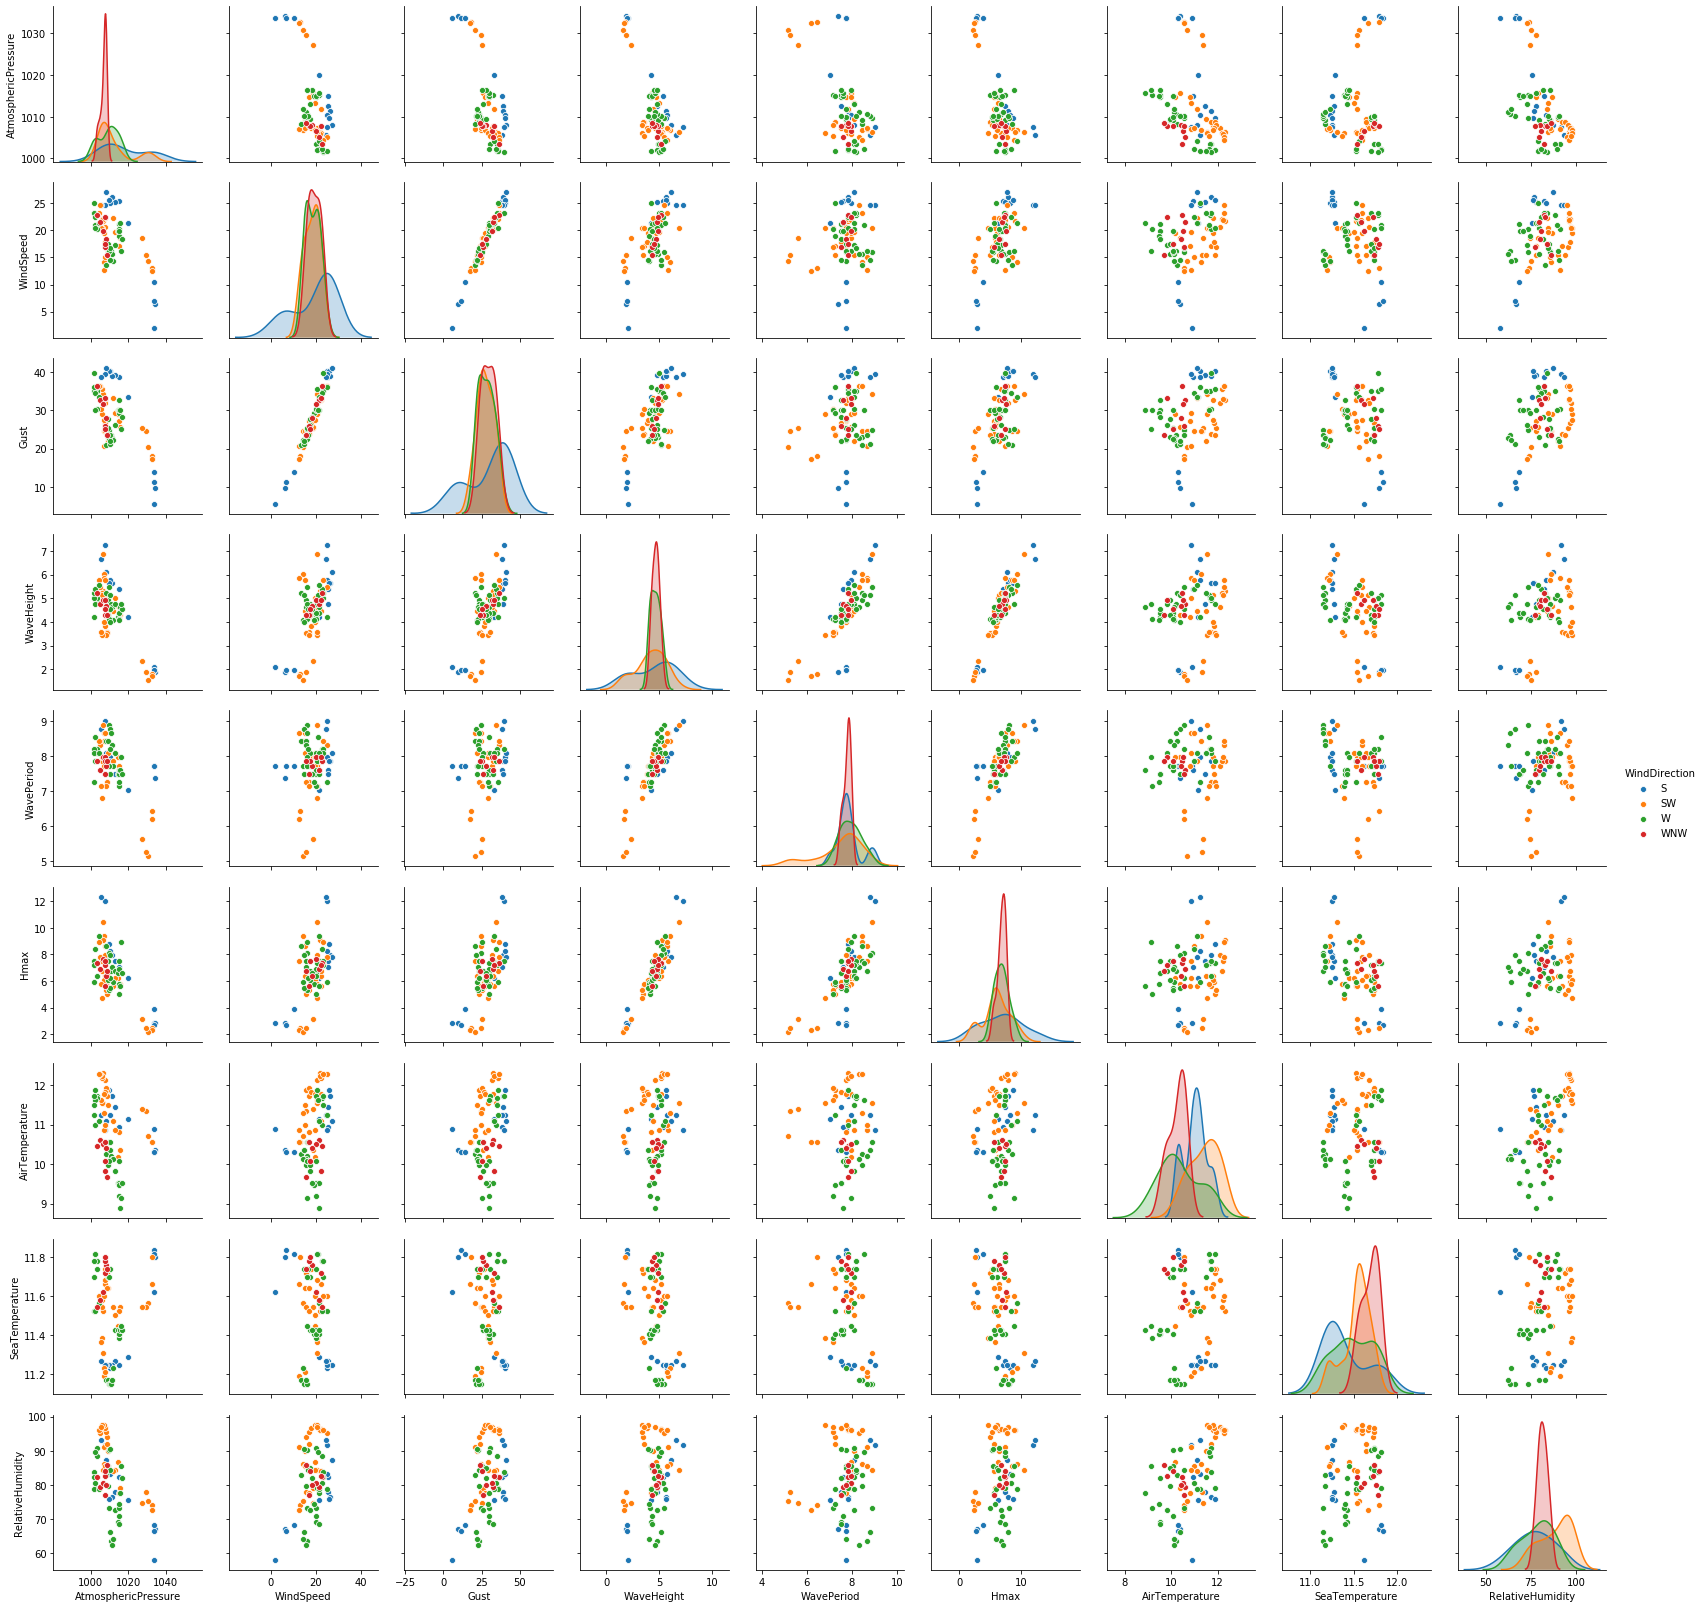

In [31]:
sns.pairplot(realwaveBuoyDataSetM6.where(allfilters), hue="WindDirection")

### Create simulated Dataset

First thing to do is the get the descriptive statistics for the data for each wind direction for simulated dataset 






In [42]:
print("Number of west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "W")))
print("Number of south is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "S")))
print("Number of south west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "SW")))
print("Number of west north west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "WNW")))

Number of west is 66
Number of south is 20
Number of south west is 73
Number of west north west is 31


In [45]:
total = 60 + 20 + 73 + 31
print("Percentage of west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "W")/total))
print("Percentage of south is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "S")/total))
print("Percentage of south west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "SW")/total))
print("Percentage of west north west is " + str(np.sum(realwaveBuoyDataSet['WindDirection'] == "WNW")/total))

Percentage of west is 0.358695652173913
Percentage of south is 0.10869565217391304
Percentage of south west is 0.3967391304347826
Percentage of west north west is 0.16847826086956522


In [ ]:
 0.358695652173913 + 0.108695652173913040.16847826086956522

### Descriptive statistics for south direction 

In [32]:
realwaveBuoyDataSetM6.where((realwaveBuoyDataSet['WindDirection'] == "S")).describe()


,AtmosphericPressure,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,RelativeHumidity
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1018.103538,19.301538,29.985538,4.561385,7.869538,6.935154,11.033769,11.413769,77.208538
std,11.438579,9.146731,13.997298,1.945598,0.534522,3.220204,0.500399,0.250775,10.440675
min,1005.562000,2.049000,5.692000,1.875000,7.031000,2.656000,10.313000,11.230000,58.008000
25%,1009.761000,10.474000,13.889000,2.109000,7.617000,3.906000,10.850000,11.250000,68.262000
50%,1012.691000,24.705000,38.594000,5.391000,7.734000,7.500000,11.094000,11.270000,76.563000
75%,1033.638000,25.388000,39.505000,5.781000,7.969000,8.281000,11.240000,11.621000,83.301000
max,1034.029000,26.982000,40.871000,7.266000,9.023000,12.344000,11.875000,11.836000,93.164000


In [33]:
realwaveBuoyDataSetM6.where((realwaveBuoyDataSet['WindDirection'] == "SW")).describe()

,AtmosphericPressure,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,RelativeHumidity
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1012.199586,18.368690,27.613897,4.243069,7.520241,6.115414,11.427172,11.538966,88.510241
std,9.020857,3.406538,5.349383,1.406147,0.979110,2.175797,0.626912,0.158439,8.534396
min,1004.439000,12.523000,17.305000,1.563000,5.156000,2.188000,10.166000,11.191000,72.559000
25%,1006.295000,15.483000,24.477000,3.516000,7.148000,5.313000,10.850000,11.504000,83.984000
50%,1007.857000,18.557000,27.323000,4.453000,7.852000,6.094000,11.533000,11.543000,91.113000
75%,1014.791000,20.606000,32.560000,5.234000,8.086000,7.500000,11.875000,11.641000,96.094000
max,1032.613000,24.705000,36.317000,6.875000,8.906000,10.469000,12.314000,11.797000,97.656000


In [34]:
realwaveBuoyDataSetM6.where((realwaveBuoyDataSet['WindDirection'] == "W")).describe()

,AtmosphericPressure,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,RelativeHumidity
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000
mean,1009.343267,18.682467,28.370833,4.682367,7.953133,6.89600,10.375933,11.493333,78.444067
std,5.094898,3.148200,5.209351,0.460498,0.462413,1.11975,0.856609,0.229348,8.566778
min,1001.656000,13.662000,20.948000,3.984000,7.148000,5.00000,8.896000,11.152000,62.402000
25%,1003.731000,16.081250,23.566000,4.238500,7.617000,5.97700,9.860750,11.391750,72.778250
50%,1010.079000,18.728000,28.746500,4.687500,7.910500,6.79700,10.166000,11.435500,79.443500
75%,1014.290250,21.147500,32.161750,5.000000,8.203000,7.50000,11.069500,11.728250,84.765500
max,1016.500000,25.046000,39.619000,5.547000,8.906000,9.37500,11.875000,11.816000,90.918000


In [35]:
realwaveBuoyDataSetM6.where((realwaveBuoyDataSet['WindDirection'] == "WNW")).describe()


,AtmosphericPressure,WindSpeed,Gust,WaveHeight,WavePeriod,Hmax,AirTemperature,SeaTemperature,RelativeHumidity
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1006.905000,19.353875,29.600375,4.707125,7.793125,6.914125,10.263625,11.691875,81.469750
std,1.710876,2.750589,4.555255,0.325400,0.165918,0.666876,0.357854,0.096209,2.785575
min,1003.560000,15.483000,23.680000,4.297000,7.500000,5.625000,9.678000,11.543000,77.051000
25%,1006.172500,17.276500,25.757750,4.472500,7.704750,6.640750,10.007000,11.611250,79.785250
50%,1007.784000,19.126000,29.771500,4.727000,7.852000,7.031500,10.434500,11.728500,81.396500
75%,1007.906000,21.744750,32.902000,4.922000,7.881250,7.383000,10.520250,11.762750,83.032250
max,1008.492000,22.883000,36.431000,5.234000,7.969000,7.656000,10.605000,11.797000,85.840000


### References 

1. Marine Insitude, Data Access Form, Dataset Title: Irish Weather Buoy Network https://erddap.marine.ie/erddap/tabledap/IWBNetwork.html

2. Stackoverflow, Converting wind direction in angles to text words, https://stackoverflow.com/questions/7490660/converting-wind-direction-in-angles-to-text-words